In [46]:
# Initialize for download
from bossHandler import bossHandler
from intern.resource.boss.resource import *
from intern.remote.boss import BossRemote
from skimage import filters
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.mlab as mlab
import skfmm


In [44]:
# Use ndpulled tiff files to load input data

# shape: (7074, 11628) = (y,x)
x_range = [5200 , 6700]
y_range = [2500 , 3500]
tifPath = '/run/mount/ndpull_download/*.tif'
tifList = sorted(glob.glob(tifPath))
if tifList: # check if not empty
    im_slice = plt.imread(tifList[0])
    data_cutout = im_slice[y_range[0]:y_range[1] , x_range[0]:x_range[1]]
        
    if len(tifList)>1: # check if more than 1 file
        for tifFile in tifList[400:-1]:
            im_slice = plt.imread(tifFile)
            data_cutout = np.dstack((data_cutout, im_slice[y_range[0]:y_range[1] , x_range[0]:x_range[1]]))
            
# tifPath = '/run/mount/2ndbatch/*.tif'
# tifList = sorted(glob.glob(tifPath))
# if tifList: # check if not empty
# #     im_slice = plt.imread(tifList[0])
# #     data_cutout = im_slice[y_range[0]:y_range[1] , x_range[0]:x_range[1]]
        
#     if len(tifList)>0: # check if more than 0 files
#         for tifFile in tifList[0:300]:
#             im_slice = plt.imread(tifFile)
#             data_cutout = np.dstack((data_cutout, im_slice[y_range[0]:y_range[1] , x_range[0]:x_range[1]]))

(7074, 11628)


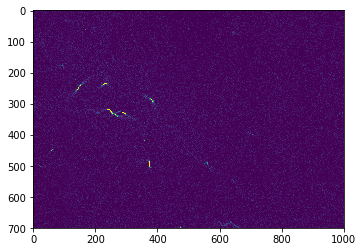

In [41]:
x_range = [5700 , 6700]
y_range = [2500 , 3200]
print(im.shape)
plt.imshow(im[y_range[0]:y_range[1],x_range[0]:x_range[1]])

In [ ]:
# Use intern to load input data

# coll_name = 'ailey-dev'
# exp_name = 'Insula_Atenolol-1_171204_new'
# chan_name = 'Ch0'

# bHandler = bossHandler(coll_name)
# # bHandler.list_experiments()
# bHandler.select_experiment(exp_name)
# exp = bHandler.get_experiment()
# bHandler.list_channels()
# bHandler.select_channel(chan_name)
# coor = bHandler.get_coordinate_frame()


# download data from Boss
# data_cutout = bHandler.get_all()
# coor = bHandler.get_coordinate_frame()
# x_rng = [348, 500]
# y_rng = [678, 878]
# z_rng = [coor.z_start, coor.z_stop]

# data_cutout = bHandler.get_cutout(x_rng, y_rng, z_rng)

# data_cutout = data_cutout.astype('uint16')

In [ ]:
class tractography:
    def __init__(self, mask , vol):
        '''
        Constructor
        '''
        self.mask = mask # binarized volume
        idx = (mask == 1)
        
        self.masked_vol = vol(idx) # raw volume

    def compute_w1(self):
        '''
        Compute W1 for vertex weight computation
        '''
        min_intensity = np.min(self.masked_vol)
        max_intensity = np.max(self.masked_vol)
        idx = (self.mask == 1)
        w1 = np.zeros(self.mask.shape)
        for i in idx:
            intensity = self.masked_vol(i)
            w1[i] = (intensity - min_intensity)/(max_intensity - min_intensity)
        return w1
    
    def compute_w2(self):
        '''
        Compute W2 for vertex weight computation; Distance from boundaries.
        '''
        
        w2 = 0
        return w2
    
    def compute_w3(self):
        '''
        Compute W3 for vertex weight computation; Laplacian of edges
        '''
        w3 = 0
        return w3
        
    def compute_vertex_wight(self):
        '''
        Compute vetex weight
        '''
        w1 = self.compute_w1()
        w2 = self.compute_w2()
        w3 = self.compute_w3()
        
        vw = (w1 + w2 + w3)/3.0
        
        return vw
            